In [1]:
%matplotlib inline

log-polar transformed, and mirrored at the vertical meridian, to approximate the retinotopic translation from cortical coordinates in (both hemispheres’) 

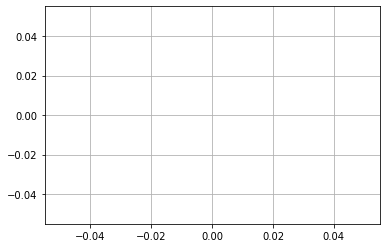

In [26]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML


def data_gen(x = np.linspace(0, 10*np.pi, 500), shift = 0):
    for cnt in itertools.count():
        A = cnt / 100
        yield A * np.sin(x+shift)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()

x = np.linspace(0, 10*np.pi, 500)
def y(x, shift = 0, A = 1): return A * np.sin(x+shift)

line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    xdata = np.linspace(0, 10*np.pi, 500)
    ydata = data
    #xdata.append(t)
    #ydata.append(y)
    xmin, xmax = (-1, 1) #ax.get_xlim()

    #if t >= xmax:
    #    ax.set_xlim(xmin, 2*xmax)
    #    ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, interval=100, init_func=init)
plt.show()

In [27]:
HTML(ani.to_html5_video())


0.62


(-1.0, 1.0)

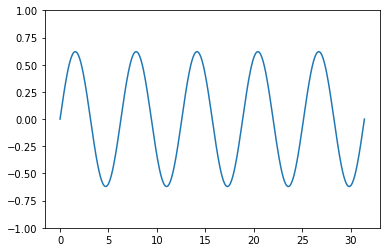

In [64]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def data_gen(x = np.linspace(0, 10*np.pi, 500), shift = 0):
    for cnt in itertools.count():
        A = cnt / 100
        #print(A)
        yield A * np.sin(x+shift)

        
x = np.linspace(0, 10*np.pi, 500)
X, Y = np.meshgrid(x, x)


#dat = data_gen()
plt.plot(x, next(dat))
plt.ylim(-1, 1)

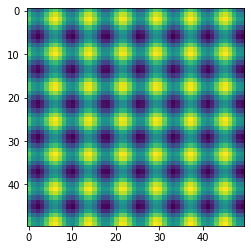

In [12]:
import numpy as np

x = np.linspace(0, 10*np.pi, 50) 
X, Y = np.meshgrid(x, x)

def y(x): return np.sin(x+np.pi)

wavelength = 5
angle = np.pi / 2
grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

angle2 = np.pi
A = 1

grating2 = np.sin(
    2*np.pi*(X*np.cos(angle2) + Y*np.sin(angle2)) / wavelength
)


def double_grating(X, Y, wavelengths = (5, 5), amplitude = 1, angles = (np.pi, np.pi/2)):
    
    # unpack tuples
    wl0, wl1 = wavelengths
    angle0, angle1 = angles
    
    grating0 = np.sin(2*np.pi*(X*np.cos(angle0) + Y*np.sin(angle0)) / wl0)
    grating1 = np.sin(2*np.pi*(X*np.cos(angle1) + Y*np.sin(angle1)) / wl1)

    return A * (grating0 + grating1)
    

#plt.plot(x, y(x))

plt.set_cmap("viridis")
#plt.imshow(A*(grating + grating2), vmax = 1.2, vmin = -1.2)
plt.imshow(double_grating(X, Y))#, vmax = 1.2, vmin = -1.2)
plt.show()

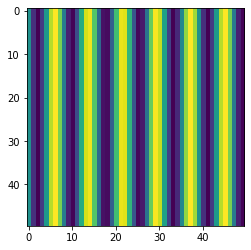

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(grating)
im.set_data(grating2)

TypeError: data_gen() missing 2 required positional arguments: 'X' and 'Y'

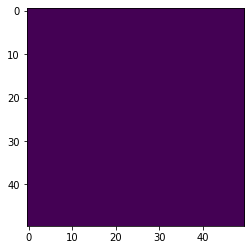

In [37]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

def double_grating(X, Y, wavelengths = (5, 5), amplitude = 1, angles = (np.pi, np.pi/2)):
    
    # unpack tuples
    wl0, wl1 = wavelengths
    angle0, angle1 = angles
    
    grating0 = np.sin(2*np.pi*(X*np.cos(angle0) + Y*np.sin(angle0)) / wl0)
    grating1 = np.sin(2*np.pi*(X*np.cos(angle1) + Y*np.sin(angle1)) / wl1)

    return amplitude * (grating0 + grating1)  

def data_gen(X, Y):
    for cnt in itertools.count():
        A = cnt / 100
        yield double_grating(X, Y, amplitude = A)

def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    im.set_data(xdata, ydata)
    return im,

fig, ax = plt.subplots()

#x = np.linspace(0, 10*np.pi, 500)

x = np.linspace(0, 10*np.pi, 50) 
X, Y = np.meshgrid(x, x)

#def y(x, shift = 0, A = 1): return A * np.sin(x+shift)

#line, = ax.plot([], [], lw=2)
#ax.grid()
im = ax.imshow(np.zeros((50, 50)))
xdata, ydata = [], []


def run(data):
    # update the data
    #xdata = np.linspace(0, 10*np.pi, 500)
    #ydata = data
    #xdata.append(t)
    #ydata.append(y)
    xmin, xmax = (-1, 1) #ax.get_xlim()

    #if t >= xmax:
    #    ax.set_xlim(xmin, 2*xmax)
    #    ax.figure.canvas.draw()
    im.set_data(data)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, interval=100, init_func=init)
plt.show()

In [73]:

def double_grating(X, Y, wavelengths = (5, 5), amplitude = 1, angles = (np.pi, np.pi/2)):
    
    # unpack tuples
    wl0, wl1 = wavelengths
    angle0, angle1 = angles
    
    grating0 = np.sin(2*np.pi*(X*np.cos(angle0) + Y*np.sin(angle0)) / wl0)
    grating1 = np.sin(2*np.pi*(X*np.cos(angle1) + Y*np.sin(angle1)) / wl1)

    return amplitude * (grating0 + grating1)  

[a for a in np.linspace(-1, 100, 1)]
a_space = np.append(np.linspace(-1, 1), np.flip(np.linspace(-1,1)))
gratings = np.array([double_grating(X, Y, amplitude = a) for a in a_space])


In [50]:
[double_grating(X, Y, amplitude = a) for a in a_space]

[array([[-0.00000000e+00,  7.21303172e-01,  9.99177245e-01, ...,
          1.67153439e-01,  8.26928808e-01,  9.78340551e-01],
        [-7.21303172e-01, -0.00000000e+00,  2.77874074e-01, ...,
         -5.54149732e-01,  1.05625636e-01,  2.57037380e-01],
        [-9.99177245e-01, -2.77874074e-01, -0.00000000e+00, ...,
         -8.32023806e-01, -1.72248438e-01, -2.08366942e-02],
        ...,
        [-1.67153439e-01,  5.54149732e-01,  8.32023806e-01, ...,
         -7.02216063e-15,  6.59775369e-01,  8.11187112e-01],
        [-8.26928808e-01, -1.05625636e-01,  1.72248438e-01, ...,
         -6.59775369e-01, -3.99680289e-15,  1.51411743e-01],
        [-9.78340551e-01, -2.57037380e-01,  2.08366942e-02, ...,
         -8.11187112e-01, -1.51411743e-01, -0.00000000e+00]]),
 array([[-0.00000000e+00,  6.91862226e-01,  9.58394501e-01, ...,
          1.60330850e-01,  7.93176612e-01,  9.38408284e-01],
        [-6.91862226e-01, -0.00000000e+00,  2.66532275e-01, ...,
         -5.31531376e-01,  1.01314386e

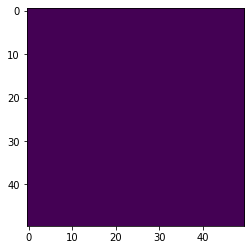

In [47]:
plt.imshow(double_grating(X, Y, amplitude = 0))

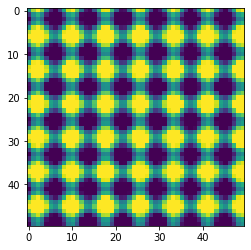

In [61]:
plt.imshow(gratings[0],  vmax = 1, vmin = -1)

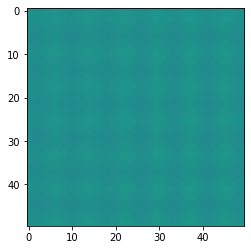

In [63]:
im = plt.imshow(gratings[49],  vmax = 1, vmin = -1)
im.set_array(gratings[25])

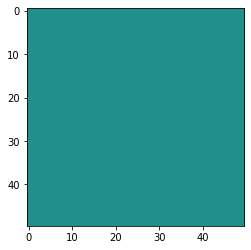

In [80]:
# initialization function: plot the background of each frame
def init():
    im.set_data(np.zeros((50, 50)))
    return [im]

# animation function.  This is called sequentially
def animate(i):
    im.set_array(gratings[i])
    return [im]

fig, ax = plt.subplots()

x = np.linspace(0, 10*np.pi, 50) 
X, Y = np.meshgrid(x, x)

im = ax.imshow(np.zeros((50, 50)), vmax = 1, vmin = -1)
ani = animation.FuncAnimation(fig, animate, interval=50, frames = 100, init_func=init)


In [81]:
HTML(ani.to_html5_video())


In [135]:
! pip install scikit-image==0.19.2

  Found existing installation: PyWavelets 1.0.3
    Uninstalling PyWavelets-1.0.3:
      Successfully uninstalled PyWavelets-1.0.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Zugriff verweigert: 'c:\\users\\gffun\\anaconda3\\lib\\site-packages\\~ywt\\_extensions\\_cwt.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [125]:
from math import ceil, log, pi, exp, sin, cos
from numpy import array, zeros
_transforms = {}

def _get_transform(i_0, j_0, i_n, j_n, p_n, t_n, p_s, t_s):
    transform = _transforms.get((i_0, j_0, i_n, j_n, p_n, t_n))

    if transform == None:
        i_k = []
        j_k = []
        p_k = []
        t_k = []

        for p in range(0, p_n):
            p_exp = exp(p * p_s)
            for t in range(0, t_n):
                t_rad = t * t_s

                i = int(i_0 + p_exp * sin(t_rad))
                j = int(j_0 + p_exp * cos(t_rad))

                if 0 <= i < i_n and 0 <= j < j_n:
                    i_k.append(i)
                    j_k.append(j)
                    p_k.append(p)
                    t_k.append(t)

        transform = ((array(p_k), array(t_k)), (array(i_k), array(j_k)))
        _transforms[i_0, j_0, i_n, j_n, p_n, t_n] = transform

    return transform

def logpolar_fancy(image, i_0 = 0, j_0 = 0, p_n=None, t_n=None):
    (i_n, j_n) = image.shape[:2]
    
    i_c = max(i_0, i_n - i_0)
    j_c = max(j_0, j_n - j_0)
    d_c = (i_c ** 2 + j_c ** 2) ** 0.5
    
    if p_n == None:
        p_n = int(ceil(d_c))
    
    if t_n == None:
        t_n = j_n
    
    p_s = log(d_c) / p_n
    t_s = 2.0 * pi / t_n
    
    (pt, ij) = _get_transform(i_0, j_0, i_n, j_n, p_n, t_n, p_s, t_s)

    transformed = zeros((p_n, t_n) + image.shape[2:], dtype=image.dtype)

    transformed[pt] = image[ij]
    return transformed

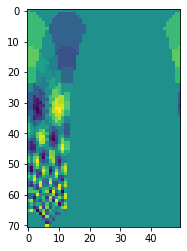

In [136]:
#import skimage.transform.warp as warp

radius = gratings[0].shape[0] // 8 
#warped = skimage.transform.warp_polar(gratings[0], radius=radius, output_shape=gratings[0].shape,
#                             scaling='log')
#warped = warp_polar(gratings[0], radius=radius, output_shape=gratings[0].shape,
#                             scaling='log')

warped = logpolar_fancy(gratings[0], i_0 = 0, j_0 = 0,)

plt.imshow(warped)

In [94]:
skimage.__version__

'0.15.0'

In [103]:
def warp(image, inverse_map, map_args={}, output_shape=None, order=None,
         mode='constant', cval=0., clip=True, preserve_range=False):
    """Warp an image according to a given coordinate transformation.
    Parameters
    ----------
    image : ndarray
        Input image.
    inverse_map : transformation object, callable ``cr = f(cr, **kwargs)``, or ndarray
        Inverse coordinate map, which transforms coordinates in the output
        images into their corresponding coordinates in the input image.
        There are a number of different options to define this map, depending
        on the dimensionality of the input image. A 2-D image can have 2
        dimensions for gray-scale images, or 3 dimensions with color
        information.
         - For 2-D images, you can directly pass a transformation object,
           e.g. `skimage.transform.SimilarityTransform`, or its inverse.
         - For 2-D images, you can pass a ``(3, 3)`` homogeneous
           transformation matrix, e.g.
           `skimage.transform.SimilarityTransform.params`.
         - For 2-D images, a function that transforms a ``(M, 2)`` array of
           ``(col, row)`` coordinates in the output image to their
           corresponding coordinates in the input image. Extra parameters to
           the function can be specified through `map_args`.
         - For N-D images, you can directly pass an array of coordinates.
           The first dimension specifies the coordinates in the input image,
           while the subsequent dimensions determine the position in the
           output image. E.g. in case of 2-D images, you need to pass an array
           of shape ``(2, rows, cols)``, where `rows` and `cols` determine the
           shape of the output image, and the first dimension contains the
           ``(row, col)`` coordinate in the input image.
           See `scipy.ndimage.map_coordinates` for further documentation.
        Note, that a ``(3, 3)`` matrix is interpreted as a homogeneous
        transformation matrix, so you cannot interpolate values from a 3-D
        input, if the output is of shape ``(3,)``.
        See example section for usage.
    map_args : dict, optional
        Keyword arguments passed to `inverse_map`.
    output_shape : tuple (rows, cols), optional
        Shape of the output image generated. By default the shape of the input
        image is preserved.  Note that, even for multi-band images, only rows
        and columns need to be specified.
    order : int, optional
        The order of interpolation. The order has to be in the range 0-5:
         - 0: Nearest-neighbor
         - 1: Bi-linear (default)
         - 2: Bi-quadratic
         - 3: Bi-cubic
         - 4: Bi-quartic
         - 5: Bi-quintic
         Default is 0 if image.dtype is bool and 1 otherwise.
    mode : {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}, optional
        Points outside the boundaries of the input are filled according
        to the given mode.  Modes match the behaviour of `numpy.pad`.
    cval : float, optional
        Used in conjunction with mode 'constant', the value outside
        the image boundaries.
    clip : bool, optional
        Whether to clip the output to the range of values of the input image.
        This is enabled by default, since higher order interpolation may
        produce values outside the given input range.
    preserve_range : bool, optional
        Whether to keep the original range of values. Otherwise, the input
        image is converted according to the conventions of `img_as_float`.
        Also see
        https://scikit-image.org/docs/dev/user_guide/data_types.html
    Returns
    -------
    warped : double ndarray
        The warped input image.
    Notes
    -----
    - The input image is converted to a `double` image.
    - In case of a `SimilarityTransform`, `AffineTransform` and
      `ProjectiveTransform` and `order` in [0, 3] this function uses the
      underlying transformation matrix to warp the image with a much faster
      routine.
    Examples
    --------
    >>> from skimage.transform import warp
    >>> from skimage import data
    >>> image = data.camera()
    The following image warps are all equal but differ substantially in
    execution time. The image is shifted to the bottom.
    Use a geometric transform to warp an image (fast):
    >>> from skimage.transform import SimilarityTransform
    >>> tform = SimilarityTransform(translation=(0, -10))
    >>> warped = warp(image, tform)
    Use a callable (slow):
    >>> def shift_down(xy):
    ...     xy[:, 1] -= 10
    ...     return xy
    >>> warped = warp(image, shift_down)
    Use a transformation matrix to warp an image (fast):
    >>> matrix = np.array([[1, 0, 0], [0, 1, -10], [0, 0, 1]])
    >>> warped = warp(image, matrix)
    >>> from skimage.transform import ProjectiveTransform
    >>> warped = warp(image, ProjectiveTransform(matrix=matrix))
    You can also use the inverse of a geometric transformation (fast):
    >>> warped = warp(image, tform.inverse)
    For N-D images you can pass a coordinate array, that specifies the
    coordinates in the input image for every element in the output image. E.g.
    if you want to rescale a 3-D cube, you can do:
    >>> cube_shape = np.array([30, 30, 30])
    >>> rng = np.random.default_rng()
    >>> cube = rng.random(cube_shape)
    Setup the coordinate array, that defines the scaling:
    >>> scale = 0.1
    >>> output_shape = (scale * cube_shape).astype(int)
    >>> coords0, coords1, coords2 = np.mgrid[:output_shape[0],
    ...                    :output_shape[1], :output_shape[2]]
    >>> coords = np.array([coords0, coords1, coords2])
    Assume that the cube contains spatial data, where the first array element
    center is at coordinate (0.5, 0.5, 0.5) in real space, i.e. we have to
    account for this extra offset when scaling the image:
    >>> coords = (coords + 0.5) / scale - 0.5
    >>> warped = warp(cube, coords)
    """

    if image.size == 0:
        raise ValueError("Cannot warp empty image with dimensions",
                         image.shape)

    order = _validate_interpolation_order(image.dtype, order)

    if order > 0:
        image = convert_to_float(image, preserve_range)
        if image.dtype == np.float16:
            image = image.astype(np.float32)

    input_shape = np.array(image.shape)

    if output_shape is None:
        output_shape = input_shape
    else:
        output_shape = safe_as_int(output_shape)

    warped = None

    if order == 2:
        # When fixing this issue, make sure to fix the branches further
        # below in this function
        warn("Bi-quadratic interpolation behavior has changed due "
             "to a bug in the implementation of scikit-image. "
             "The new version now serves as a wrapper "
             "around SciPy's interpolation functions, which itself "
             "is not verified to be a correct implementation. Until "
             "skimage's implementation is fixed, we recommend "
             "to use bi-linear or bi-cubic interpolation instead.")

    if order in (1, 3) and not map_args:
        # use fast Cython version for specific interpolation orders and input

        matrix = None

        if isinstance(inverse_map, np.ndarray) and inverse_map.shape == (3, 3):
            # inverse_map is a transformation matrix as numpy array
            matrix = inverse_map

        elif isinstance(inverse_map, HOMOGRAPHY_TRANSFORMS):
            # inverse_map is a homography
            matrix = inverse_map.params

        elif (hasattr(inverse_map, '__name__') and
              inverse_map.__name__ == 'inverse' and
              get_bound_method_class(inverse_map) in HOMOGRAPHY_TRANSFORMS):
            # inverse_map is the inverse of a homography
            matrix = np.linalg.inv(inverse_map.__self__.params)

        if matrix is not None:
            matrix = matrix.astype(image.dtype)
            ctype = 'float32_t' if image.dtype == np.float32 else 'float64_t'
            if image.ndim == 2:
                warped = _warp_fast[ctype](image, matrix,
                                           output_shape=output_shape,
                                           order=order, mode=mode, cval=cval)
            elif image.ndim == 3:
                dims = []
                for dim in range(image.shape[2]):
                    dims.append(_warp_fast[ctype](image[..., dim], matrix,
                                                  output_shape=output_shape,
                                                  order=order, mode=mode,
                                                  cval=cval))
                warped = np.dstack(dims)

    if warped is None:
        # use ndi.map_coordinates

        if (isinstance(inverse_map, np.ndarray) and
                inverse_map.shape == (3, 3)):
            # inverse_map is a transformation matrix as numpy array,
            # this is only used for order >= 4.
            inverse_map = ProjectiveTransform(matrix=inverse_map)

        if isinstance(inverse_map, np.ndarray):
            # inverse_map is directly given as coordinates
            coords = inverse_map
        else:
            # inverse_map is given as function, that transforms (N, 2)
            # destination coordinates to their corresponding source
            # coordinates. This is only supported for 2(+1)-D images.

            if image.ndim < 2 or image.ndim > 3:
                raise ValueError("Only 2-D images (grayscale or color) are "
                                 "supported, when providing a callable "
                                 "`inverse_map`.")

            def coord_map(*args):
                return inverse_map(*args, **map_args)

            if len(input_shape) == 3 and len(output_shape) == 2:
                # Input image is 2D and has color channel, but output_shape is
                # given for 2-D images. Automatically add the color channel
                # dimensionality.
                output_shape = (output_shape[0], output_shape[1],
                                input_shape[2])

            coords = warp_coords(coord_map, output_shape)

        # Pre-filtering not necessary for order 0, 1 interpolation
        prefilter = order > 1

        ndi_mode = _to_ndimage_mode(mode)
        warped = ndi.map_coordinates(image, coords, prefilter=prefilter,
                                     mode=ndi_mode, order=order, cval=cval)

    _clip_warp_output(image, warped, mode, cval, clip)

    return warped

def _log_polar_mapping(output_coords, k_angle, k_radius, center):
    """Inverse mapping function to convert from cartesian to polar coordinates
    Parameters
    ----------
    output_coords : ndarray
        `(M, 2)` array of `(col, row)` coordinates in the output image
    k_angle : float
        Scaling factor that relates the intended number of rows in the output
        image to angle: ``k_angle = nrows / (2 * np.pi)``
    k_radius : float
        Scaling factor that relates the radius of the circle bounding the
        area to be transformed to the intended number of columns in the output
        image: ``k_radius = width / np.log(radius)``
    center : tuple (row, col)
        Coordinates that represent the center of the circle that bounds the
        area to be transformed in an input image.
    Returns
    -------
    coords : ndarray
        `(M, 2)` array of `(col, row)` coordinates in the input image that
        correspond to the `output_coords` given as input.
    """
    angle = output_coords[:, 1] / k_angle
    rr = ((np.exp(output_coords[:, 0] / k_radius)) * np.sin(angle)) + center[0]
    cc = ((np.exp(output_coords[:, 0] / k_radius)) * np.cos(angle)) + center[1]
    coords = np.column_stack((cc, rr))
    return coords

def warp_polar(image, center=None, *, radius=None, output_shape=None,
               scaling='linear', multichannel=False, channel_axis=None,
               **kwargs):
    """Remap image to polar or log-polar coordinates space.
    Parameters
    ----------
    image : ndarray
        Input image. Only 2-D arrays are accepted by default. 3-D arrays are
        accepted if a `channel_axis` is specified.
    center : tuple (row, col), optional
        Point in image that represents the center of the transformation (i.e.,
        the origin in cartesian space). Values can be of type `float`.
        If no value is given, the center is assumed to be the center point
        of the image.
    radius : float, optional
        Radius of the circle that bounds the area to be transformed.
    output_shape : tuple (row, col), optional
    scaling : {'linear', 'log'}, optional
        Specify whether the image warp is polar or log-polar. Defaults to
        'linear'.
    multichannel : bool, optional
        Whether the image is a 3-D array in which the third axis is to be
        interpreted as multiple channels. If set to `False` (default), only 2-D
        arrays are accepted. This argument is deprecated: specify
        `channel_axis` instead.
    channel_axis : int or None, optional
        If None, the image is assumed to be a grayscale (single channel) image.
        Otherwise, this parameter indicates which axis of the array corresponds
        to channels.
        .. versionadded:: 0.19
           ``channel_axis`` was added in 0.19.
    **kwargs : keyword arguments
        Passed to `transform.warp`.
    Returns
    -------
    warped : ndarray
        The polar or log-polar warped image.
    Examples
    --------
    Perform a basic polar warp on a grayscale image:
    >>> from skimage import data
    >>> from skimage.transform import warp_polar
    >>> image = data.checkerboard()
    >>> warped = warp_polar(image)
    Perform a log-polar warp on a grayscale image:
    >>> warped = warp_polar(image, scaling='log')
    Perform a log-polar warp on a grayscale image while specifying center,
    radius, and output shape:
    >>> warped = warp_polar(image, (100,100), radius=100,
    ...                     output_shape=image.shape, scaling='log')
    Perform a log-polar warp on a color image:
    >>> image = data.astronaut()
    >>> warped = warp_polar(image, scaling='log', channel_axis=-1)
    """
    multichannel = channel_axis is not None
    if image.ndim != 2 and not multichannel:
        raise ValueError(f'Input array must be 2-dimensional when '
                         f'`channel_axis=None`, got {image.ndim}')

    if image.ndim != 3 and multichannel:
        raise ValueError(f'Input array must be 3-dimensional when '
                         f'`channel_axis` is specified, got {image.ndim}')

    if center is None:
        center = (np.array(image.shape)[:2] / 2) - 0.5

    if radius is None:
        w, h = np.array(image.shape)[:2] / 2
        radius = np.sqrt(w ** 2 + h ** 2)

    if output_shape is None:
        height = 360
        width = int(np.ceil(radius))
        output_shape = (height, width)
    else:
        output_shape = output_shape
        height = output_shape[0]
        width = output_shape[1]

    if scaling == 'linear':
        k_radius = width / radius
        map_func = _linear_polar_mapping
    elif scaling == 'log':
        k_radius = width / np.log(radius)
        map_func = _log_polar_mapping
    else:
        raise ValueError("Scaling value must be in {'linear', 'log'}")

    k_angle = height / (2 * np.pi)
    warp_args = {'k_angle': k_angle, 'k_radius': k_radius, 'center': center}

    warped = warp(image, map_func, map_args=warp_args,
                  output_shape=output_shape, **kwargs)

    return warped